# Задача классификации в сфере кредитования

## Необходимо реализовать классификатор с помощью машинного обучения, который бы разбивал клиентов на две категории:
* Клиент, благоприятный для банка как заемщик
* Клиент, соответвенно неблагоприятный для банка как заемщик


### Предварительный обзор датафрейма

Импортируем файл и просмотрим начало датафрейма. Заметим, что заголовки столбцов разноплановые и не очень осмысленные, поэтому в дальнейшем имеет смысл установить показатель header в значение None.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/Xiaomi/Desktop/Data/Predicting Credit Card Approvals/datasets/cc_approvals.data')

In [3]:
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


Обратим внимание на последний столбец, который подразумевает под собой вердикт того, можно ли выдавать клиенту кредит, или нет. Именно это значение нам и предстоит взять за целевую переменную в дальнейшем.

In [5]:
credit_data = pd.read_csv('C:/Users/Xiaomi/Desktop/Data/Predicting Credit Card Approvals/datasets/cc_approvals.data', header = None)

Вновь осмотрим начало нашего датафрейма и убедимся в том, что заголовки заменены. После чего исследуем наши данные.

In [6]:
credit_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [265]:
credit_data.shape

(690, 16)

In [7]:
credit_data.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [8]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


Посмотрим хвост нашего датафрейма и заметим, как минимум, пропущенные данные в столбце под индексом [0], которые обозначены знаком "?". В дальнейшем будет проведена предобработка данных для благоприятной загрузки и обработки в алгоритмах ML.
 

In [9]:
credit_data.tail(17)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


Исследуем все столбцы на наличие отсутствующих данных.

In [12]:
credit_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

В идеале все значения должны были быть по нулям, но это не так) 
Поэтому преступим к предварительной обработка нашего датафрейма.

### Обработка данных

Для начала еще раз посмотрим на типы данных наших столбцов. Дело в том, что обработка numeric и non-numeric данных несколько отличается и каждую мы рассмотрим по отдельности.

In [11]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


Заметим, что все столбцы нашего датафрейма кроме 2, 7, 10, 14 имеют строковый формат.

Начнем с того, что заменим обозначение отсутствующих данных в виде "?" наиболее приемлемыми для ML обозначением NaN.

In [14]:
credit_data = credit_data.replace("?", np.NaN)
credit_data.tail(17)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


Одной из стратегий заполнения отсутствующих числовых значений является постановка среднего значения, для наглядности посчитаем среднее значение по каждому числовому столбцу нашего датафрейма.

In [15]:
credit_data.mean()

2        4.758725
7        2.223406
10       2.400000
14    1017.385507
dtype: float64

Но при этом не стоит забывать о возможном наличии выбросов в наших данных. Как известно средснее значение подвержено влиянию выбросов, тогда как, например, медиана является робастной оценкой центрального положения.

In [17]:
credit_data.median()

2     2.75
7     1.00
10    0.00
14    5.00
dtype: float64

Заполним пропуски в числовых значениях средним.

In [18]:
credit_data.fillna(credit_data.mean(), inplace=True)
credit_data.tail(17)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


После этого заметим, что столбец 2,7,10, 14 не имеет пропусков.

In [19]:
credit_data.isnull().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

Теперь необходимо разобраться с пропусками в данных с типом object. Используем стратегию подстановки наиболее часто встречаемого значения по признаку.

In [20]:
for col in credit_data:
    if credit_data[col].dtypes == 'object':
        credit_data = credit_data.fillna(credit_data[col].value_counts().index[0])
credit_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

Давайте пожалуй еще раз посмотрим на наш датафрейм, чтобы оценить как он преобразовался. На этом предварительная обработка данных не закончена и нам необходимо преобразовать все столбцы в числовой формат, который наилучшим образом воспринимается алгоритмами машинного обучения.

In [21]:
credit_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [22]:
credit_data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


Преобразуем все в единый формат.

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in credit_data:
    if credit_data[col].dtypes == "object":
        credit_data[col] = le.fit_transform(credit_data[col])
credit_data.dtypes

0       int32
1       int32
2     float64
3       int32
4       int32
5       int32
6       int32
7     float64
8       int32
9       int32
10      int64
11      int32
12      int32
13      int32
14      int64
15      int32
dtype: object

In [25]:
credit_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,156,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0,0
1,0,328,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0
2,0,89,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824,0
3,1,125,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0
4,1,43,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0


In [26]:
credit_data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,1,52,10.085,3,3,5,4,1.25,0,0,0,0,0,90,0,1
686,0,71,0.750,2,1,2,8,2.00,0,1,2,1,0,67,394,1
687,0,97,13.500,3,3,6,3,2.00,0,1,1,1,0,67,1,1
688,1,20,0.205,2,1,0,8,0.04,0,0,0,0,0,96,750,1
689,1,197,3.375,2,1,2,4,8.29,0,0,0,1,0,0,0,1


Заметим, что стобец [15] наша целевая переменная теперь преобразована в числовой формат и 1 означает, что кредит клиенту одобрен, а 0 соответсвенно нет.

### Разбиение данных

Отделим нашу целевую переменную от основного датафрейма.

In [27]:
X = credit_data.iloc[:, :15].values
y = credit_data.iloc[:, 15].values

Теперь разделим наши данные на обучающий и тестовый набор с помощью train_test_split.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

### Масштабирование данных

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.transform(X_test)

### Обучение модели

Попробуем прогнать наши данные через логистическую регрессию.

In [243]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(rescaled_X_train, y_train)
y_pred_logreg = logreg.predict(rescaled_X_test)

C:\Users\Xiaomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Accuracy логистической регрессии

In [32]:
print("Accuracy logreg на обучающем наборе: {}".format(logreg.score(rescaled_X_train, y_train)))
print("Accuracy logreg на тестовом наборе: {}".format(logreg.score(rescaled_X_test, y_test)))

Accuracy logreg на обучающем наборе: 0.8701298701298701
Accuracy logreg на тестовом наборе: 0.8333333333333334


Посмотрим на матрицу ошибок.

### Confusion matrix on LogisticRegression

In [244]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(rescaled_X_test)
print('Сonfusion matrix on logreg:\n{}'.format(confusion_matrix(y_test, y_pred_logreg)))

Сonfusion matrix on logreg:
[[92 11]
 [27 98]]


### f-1 score on LogisticRegression

In [245]:
from sklearn.metrics import f1_score
print("f-1 score логистической регрессии: {}".format(f1_score(y_test, y_pred_logreg)))

f-1 score логистической регрессии: 0.8376068376068376


### Classification report on LogisticRegression

In [246]:
from sklearn.metrics import classification_report
print("classification_report on logreg: \n {}".format(classification_report(y_test, y_pred_logreg)))

classification_report on logreg: 
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       103
           1       0.90      0.78      0.84       125

    accuracy                           0.83       228
   macro avg       0.84      0.84      0.83       228
weighted avg       0.84      0.83      0.83       228



### Precision & recall curve 

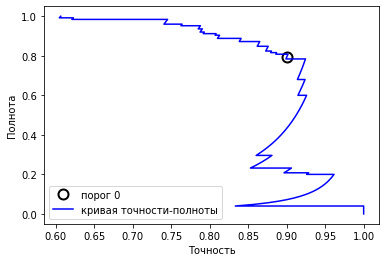

In [247]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, logreg.decision_function(rescaled_X_test))
close_zero = np.argmin(np.abs(thresholds)) 
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="порог 0", fillstyle="none", c='k', mew=2) 
 
plt.plot(precision, recall, color ='blue', label="кривая точности-полноты") 
plt.xlabel("Точность") 
plt.ylabel("Полнота") 
plt.legend(loc="best") 

###  ROC-AUC curve

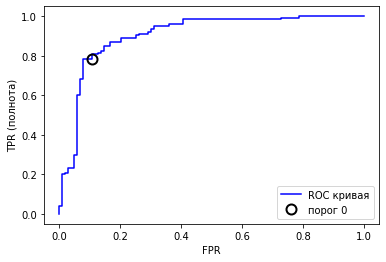

In [38]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.decision_function(rescaled_X_test))
plt.plot(fpr, tpr, color = "blue", label = "ROC кривая")
plt.xlabel("FPR")
plt.ylabel("TPR (полнота)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10, label = "порог 0", fillstyle = "none", c = "k", mew = 2)
plt.legend(loc = 4)

In [248]:
from sklearn.metrics import roc_auc_score
logreg_auc = roc_auc_score(y_test, logreg.decision_function(rescaled_X_test))
print("AUC для логистической регрессии: {:.2f}".format(logreg_auc))

AUC для логистической регрессии: 0.90


In [40]:
from sklearn.model_selection import GridSearchCV
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]
param_grid = dict(tol = tol, max_iter = max_iter)

In [249]:
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
rescaledX = scaler.fit_transform(X)
logreg_grid_model = grid_model.fit(rescaledX, y)
best_score, best_params = logreg_grid_model.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.853623 using {'max_iter': 100, 'tol': 0.01}


C:\Users\Xiaomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Xiaomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Xiaomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Xiaomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Xiaomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [250]:
y_best_logreg_pred = logreg_grid_model.predict(X_test)

In [260]:
print("Accuracy GridSearchCV логистической регрессии: {:.2f}".format(logreg_grid_model.score(X_test, y_test)))
print("precision score GridSearchCV логистической регрессии: {:.2f}".format(precision_score(y_test, y_best_logreg_pred)))
print("recall score GridSearchCV логистической регрессии: {:.2f}".format(recall_score(y_test, y_best_logreg_pred)))
print("f-1 score GridSearchCV логистической регрессии: {:.2f}".format(f1_score(y_test, y_best_logreg_pred)))
#print("Confusion matrix on GridSearchCV логистической регрессии: {:.2f}".format(confusion_matrix(y_test, y_best_logreg_pred)))


Accuracy GridSearchCV логистической регрессии: 0.68
precision score GridSearchCV логистической регрессии: 0.68
recall score GridSearchCV логистической регрессии: 0.79
f-1 score GridSearchCV логистической регрессии: 0.73


## Decision Tree Classifier

После построения логистической регрессии рассмотрим еще один алгоритм - дерево решений.

In [62]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width: 150% !important; height: 70% !important;}</style>"
HTML(style)

In [64]:
credit_data.shape

(690, 16)

Импортируем необходимые модули и обучим дерево с параметрами установленными по умолчанию, единственное ограничив глубину делева до 5.

In [204]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Импортируем модуль для подбора параметров дерева на кросс-валидации

In [124]:
from sklearn.model_selection import cross_val_score

Установим значение глубины дерева, которое может перебирать наш цикл в ходе подбора параметров.

In [125]:
max_depth_values = range(1,100)

Заведем DataFrame куда бы заносились показатели:
    1. Глубина дерева
    2. Score на train
    3. Score на test
    4. Score на кросс-валидации

In [126]:
scores_data = pd.DataFrame()

Реализуем сам цикл, в ходе которого для каждого значение из max_depth_values будет происходить обучение дерева, подсчет score на train, test и кросс-валидации. После чего необходимые показатели заносятся в DataFrame  - scores_data.

In [127]:
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)
    
    

Посмотрим на получившийся DataFrame

In [206]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.861472,0.842105,0.861354
0,2,0.867965,0.846491,0.861354
0,3,0.874459,0.842105,0.837745
0,4,0.906926,0.815789,0.835405
0,5,0.924242,0.811404,0.824723


Для удобства занесем показатели score в один общий столбец set_type

In [207]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], 
                           value_vars = ['train_score', 'test_score', 'cross_val_score'], 
                           var_name = ['set_type'], value_name = 'score')

Посмотрим что получилось.

In [209]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.861472
1,2,train_score,0.867965
2,3,train_score,0.874459
3,4,train_score,0.906926
4,5,train_score,0.924242


In [210]:
scores_data_long.tail()

,max_depth,set_type,score
292,95,cross_val_score,0.809528
293,96,cross_val_score,0.809505
294,97,cross_val_score,0.794333
295,98,cross_val_score,0.824535
296,99,cross_val_score,0.813829


Для наглядности сделаем визуализацию score в зависимости от глубины дерева. Анализируя этот график можно заметить, что для достижения оптимальных показателей score необходимо брать небольшую глубину дерева. Больше стоит доверять линии cross_val_score потому что в данном случае проводилась кросс-валидация 5-ти фолдах и показатель является более увереннным.

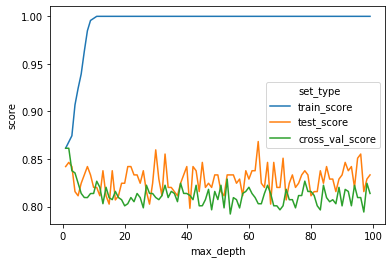

In [211]:
import seaborn as sns
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

В ходе кросс - валидации происходит разбиение исходного DataFrame на блок Train и Test, после чего Test блок откладывается для финальной проверки алгоритма. Блок Test разбивается в свою очередь на определенное количество фолдов, в нашем случае 5, каждый из которых бывает как на train так и на test процессе. Кросс-валидация тем и хороша, что она не показывает нашему алгоритму весь набор данных, тем самым не давай дереву решений подогнаться под определенную выборку. Ведь наша задача найти модель, который с наилучшей "обобщающей" способностью, которая была бы пригодная и для другого наборе данных.

Отсортируем наш датафрейм со скорами под значение set_type = cross_val_score

In [212]:
scores_data_long.query('set_type == "cross_val_score"').head(40)

,max_depth,set_type,score
198,1,cross_val_score,0.861354
199,2,cross_val_score,0.861354
200,3,cross_val_score,0.837745
201,4,cross_val_score,0.835405
202,5,cross_val_score,0.824723
203,6,cross_val_score,0.813876
204,7,cross_val_score,0.809575
205,8,cross_val_score,0.809480
206,9,cross_val_score,0.813735
207,10,cross_val_score,0.813829


Мы видим, что наилучшее качество достигается при глубине дерева равной 1 или 2, что относительно было понятно и из визуализации сделанной ранее. Для большей информативности разбиения выберем показатель глубины дерева = 5.

Создадим некий best классификатор, который будет подразумевать под DecisionTreeClassifier с max_depth = 2.

In [151]:
best_tree_clf = tree.DecisionTreeClassifier(max_depth = 2)

Покажем best_tree_clf выборки которые он ранее не видел (X_test, y_test) и посчитаем значение score на кросс-валидации.

In [152]:
cross_val_score(best_tree_clf, X_test, y_test, cv = 5).mean()

0.8115942028985506

Ради интереса узнаем score показатели best_tree_clf на обучающем и тестовом наборе, без кросс-валидации.

In [213]:
best_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [214]:
print("Accuracy on best_tree_clf на обучающем наборе: {}".format(best_tree_clf.score(X_train, y_train)))
print("Accuracy on best_tree_clf на тестовом наборе: {}".format(best_tree_clf.score(X_test, y_test)))

Accuracy on best_tree_clf на обучающем наборе: 0.8679653679653679
Accuracy on best_tree_clf на тестовом наборе: 0.8464912280701754


Теперь попробуем реализовать поиск необходимых параметров дерева решений без "перебора руками", с помощью GridSearchCV.

In [155]:
from sklearn.model_selection import GridSearchCV

Инициализируем самое обычное дерево решений и зададим параметры, которые будут подбираться с помощью GridSearchCv.

In [156]:
clf = tree.DecisionTreeClassifier()

In [157]:
parametrs = {'criterion': ['gini', 'entropy'], 
             'max_depth': range(1, 30)}

Инициализируем GridSearchCV и передадим ему необходимые параметры как clf, parametrs, и установим разбиение на 5 фолдов с помощью параметра cv.

In [161]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv = 5)

Обучим наш классификатор и посмотрим на его лучшие параметры, которые он подобрал.

In [215]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatc

Мы видим, что лучшее дерево имеет глубину 2 и энтропию, а не gini.

In [163]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 2}

Создадим некий best_clf и передадим ему классификатор, полученный с помощью GridSearchCV и обозначим его как лучшего оценщика.

In [216]:
best_clf = grid_search_cv_clf.best_estimator_

In [217]:
best_clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Покажем нашему лучшему классификатору набор данных, который он ранее не видел и оценим его качество.

In [218]:
best_clf.score(X_test, y_test)

0.8421052631578947

По умолчанию критерием качества является accuracy т.е. правильность:
    
    accuracy = ( TP + TN ) / ( TP + TN + FP + FN )
    
Но при всем при том она не является оптимальным показателем обобщающей способности алгоритма, например из-за несбалансированности классов. Поэтому необходимо использовать другие метрики качества такие как:
   
    precision = TP / ( TP + FP )
    
    recall = TP / ( TP + FN )
    
    f-1 = 2 * (( precision * recall ) / ( precision + recall ))

In [170]:
from sklearn.metrics import precision_score, recall_score, f1_score

Посмотрим какие классы предсказало лучшее дерево на данных, которые оно ранее не видело.

In [171]:
y_best_clf_pred = best_clf.predict(X_test)

Измерим precision, recall, f-1 score.

In [219]:
precision_score(y_test, y_best_clf_pred)

0.9238095238095239

In [220]:
recall_score(y_test, y_best_clf_pred)

0.776

In [221]:
f1_score(y_test, y_best_clf_pred)

0.8434782608695652

Посмотрим на матрицу ошибок.

In [226]:
print("Confusion matrix on decision tree:\n{}".format(confusion_matrix(y_test, y_best_clf_pred)))

Confusion matrix on decision tree:
[[95  8]
 [28 97]]


Проведем анализ матрицы ошибок. Стандартная матрица ошибок имеет следующий вид:

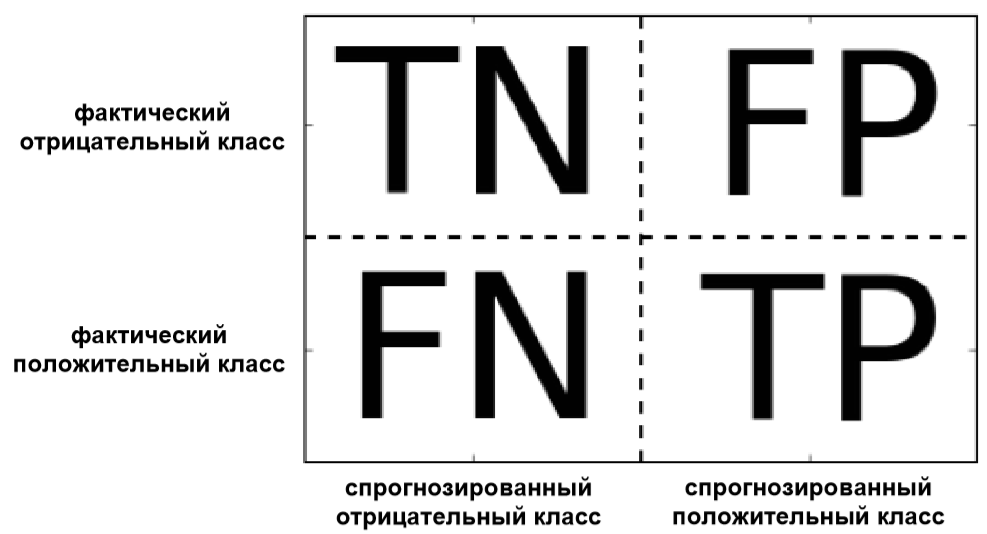

In [262]:
from IPython.display import Image
PATH = "C:/Users/Xiaomi/Pictures/Screenshots/"
Image(filename = PATH + "confusion_matrix.png", width=500, height=500)

Отталкиваясь от специфики задачи мы понимаем что банку необходимо как можно меньше выдать кредит тем людям, которые его не смогут вернуть, т.е. показатель FP должен быть минимальный.
Но при этом банку важно снизить некую упущенную выгоду, иными словами банк не должен отказывать в кредите платежеспособным клиентам, т.е. показатель FN тоже должен быть относительно небольшим.

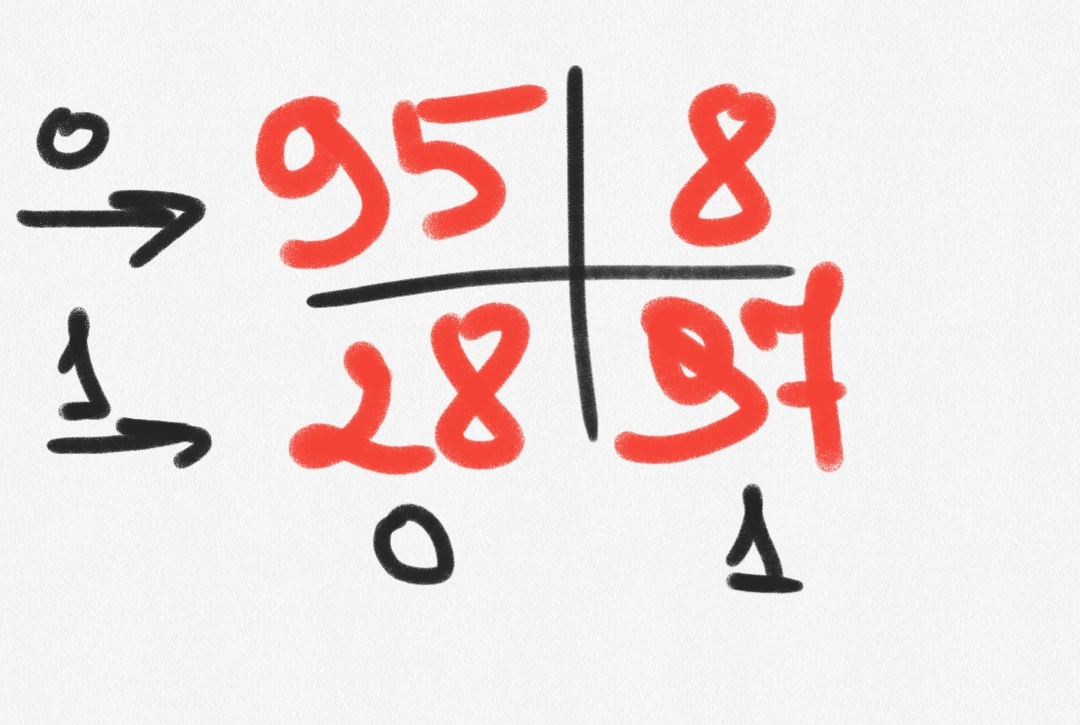

In [264]:
PATH_2 = "C:/Users/Xiaomi/Pictures/Saved Pictures/"
Image(filename = PATH_2 + "tree_conf_matrix.jpg", width=500, height=500)

    Мы видим, что показатель TN и TP составляют 95 и 97 соответственно.
    Ранее мы обсудили, что банку необходимо снизить к минимуму выдачу кредита неплатежеспособным клиентам, т.е. наш алгоритм не должен присваивать положительный класс +1 к людям, фактический класс которых является 0. Иными словами показатель FP должен быть минимальными, в нашем случае он составляет 8.
    Также банку важно снизить к минимуму "упущенную выгоду", т.е. наш алгоритм не должен присваивать класс 0 людям, которые на самом деле могли бы получить и погасить кредит. Иными словами показатель FN должен быть относительно небольшим.

Посмотрим на вероятность предсказание класса.

In [174]:
y_best_clf_pred_prob = best_clf.predict_proba(X_test)

In [175]:
y_best_clf_pred_prob

array([[0.03448276, 0.96551724],
       [0.98765432, 0.01234568],
       [0.38095238, 0.61904762],
       [0.03448276, 0.96551724],
       [0.38095238, 0.61904762],
       [0.69426752, 0.30573248],
       [0.03448276, 0.96551724],
       [0.69426752, 0.30573248],
       [0.03448276, 0.96551724],
       [0.03448276, 0.96551724],
       [0.03448276, 0.96551724],
       [0.98765432, 0.01234568],
       [0.38095238, 0.61904762],
       [0.69426752, 0.30573248],
       [0.03448276, 0.96551724],
       [0.69426752, 0.30573248],
       [0.03448276, 0.96551724],
       [0.03448276, 0.96551724],
       [0.03448276, 0.96551724],
       [0.03448276, 0.96551724],
       [0.38095238, 0.61904762],
       [0.03448276, 0.96551724],
       [0.03448276, 0.96551724],
       [0.69426752, 0.30573248],
       [0.03448276, 0.96551724],
       [0.03448276, 0.96551724],
       [0.98765432, 0.01234568],
       [0.69426752, 0.30573248],
       [0.03448276, 0.96551724],
       [0.03448276, 0.96551724],
       [0.

Создадим пандовскую серию, в которую внесем вероятность прогнозирования класса 1.

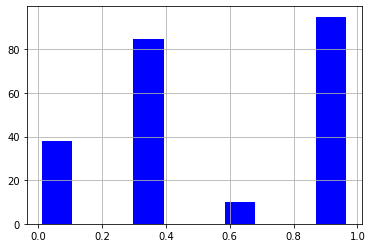

In [189]:
pd.Series(y_best_clf_pred_prob[:, 1]).hist(color = 'b')

Помимо accuracy, precision, recall и f-меры существуют другие метрики качества алгоритмов классификации. Одной из них является ROC - AUC прямая. 

Она сопоставляет долю ложно положительных примеров ( FPR ) и долю истинно положительных примеров ( TPR ), или же по другому recall.

  FPR = FP / (FP + TN )

Количество ложно положительных примеров, поделенное на общее количество отрицательных примеров.  

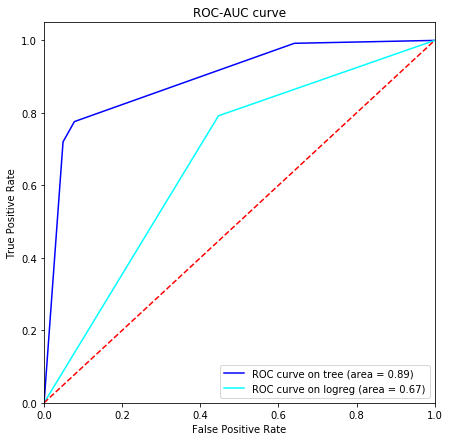

In [241]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_best_clf_pred_prob[:,1])
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_best_logreg_pred)

roc_auc_tree= auc(fpr, tpr)
roc_auc_logreg= auc(fpr_logreg, tpr_logreg)

plt.figure(figsize=(7,7))

plt.plot(fpr, tpr, color='blue', label='ROC curve on tree (area = %0.2f)' % roc_auc_tree)
plt.plot(fpr_logreg, tpr_logreg, color='cyan', label='ROC curve on logreg (area = %0.2f)' % roc_auc_logreg)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend(loc="lower right")
plt.show()

Исходя из результатов, полученных путем визуализации ROC_AUC для DecisionTree и LogisticRegression, можно сделать вывод о том, что дерево решений работает лучше чем логистическая регрессия.

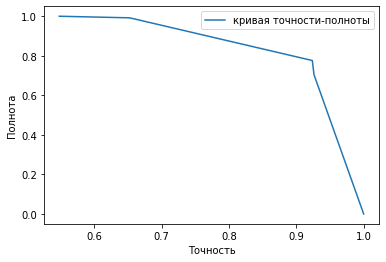

In [269]:
from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test, best_clf.predict_proba(X_test)[:,1]) 
 
plt.plot(precision, recall, label="кривая точности-полноты") 
plt.xlabel("Точность") 
plt.ylabel("Полнота") 
plt.legend(loc="best")

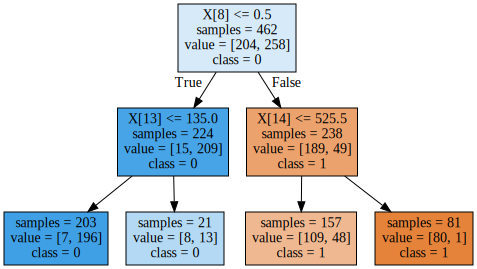

In [270]:
from sklearn.tree import export_graphviz 
export_graphviz(best_clf, out_file="tree_clf.dot", class_names=["1", "0"], impurity=False, filled=True) 
import graphviz  
with open("tree_clf.dot") as f:     
    dot_graph = f.read() 
graphviz.Source(dot_graph) 